Clustering project JUAN PABLO MONTOYA VALLEJO
EVERY POINT OF THIS PROJECT IS DONE IN THIS NOTEBOOK , YOU CAN USE THIS NOTEBOOK AS A SUMMARY OF THE WORK DONE
YOU CAN CONTRIBUTE THIS PROJECT BY A PULL REQUEST! FEEL FREE TO USE THIS IN YOUR CONVENIENCE

In [8]:
import warnings
warnings.filterwarnings('ignore')

1.	Research about the Spectral Clustering method, and answer the following questions:
    a.	In which cases might it be more useful to apply?
    b.	What are the mathematical fundamentals of it?
    c.	What is the algorithm to compute it?
    d.	Does it hold any relation to some of the concepts previously mentioned in class? Which, and how?


a.	In which cases might it be more useful to apply?

 makes no assumptions on the shapes of clusters 

b.	What are the mathematical fundamentals of it?

1. preprocessing: construct a similarity graph (e.g. knn graph) for all the data points
2. decomposition: embed data points in a low-dimensional space(spectral embedding) in wich the clusters are more obvious, with the use of the eigenvectors of the graph laplacian and make easier to identify the clusters by other methods
3. grouping: a classical clustering algorith (e.g. kmeans) is applied to partition the embedding

c.	What is the algorithm to compute it?

1. make the matrix of laplacian is calculated by the degree matrix and de adjacency matrix 
$$
  L=D-A
$$

2. the  find the eigevectors and eigenvalues of the laplacian matrix
$$
  Lv=\Lambda v
$$

3. grouping with a clustering method of the preference
$$
  KMEANS,KMEDOIDS,DBSCAN
$$


d.	Does it hold any relation to some of the concepts previously mentioned in class? Which, and how?

it uses the eigenvectors and eigenvalues that we saw in SVD, because the need to decompose the matrix,and the you can use kmeans, kmedoids as we saw in class to create the clusters



2.	Research about the DBSCAN method, and answer the following questions:
    a.	In which cases might it be more useful to apply?
    b.	What are the mathematical fundamentals of it?
    c.	Is there any relation between DBSCAN and Spectral Clustering? If so, what is it?


a.	In which cases might it be more useful to apply?
when the cluster are near or emmbedded in other cluster or nested clusters trying to connect the points based on 'seing' the density of the points like the human does
</br><img src="resources/dbscan.png" alt="dbscan Method" width="500"/></br></br>
b.	What are the mathematical fundamentals of it?

1. is based on the density of the records in the area of the matrix starts to see the points near to each point
2. core point is a point that contains equal or more neighbors as defined by the user of DBSCAN to define a cluster
3. non core point is a point that doesnt have as many neighbors as the number set in the algorithm
4. select a random core point as a cluster and add all the core points neighbors to the cluster then add the noncore points that are close to the cluster's core points
5. repeat the process until there are no more core points
6. any remain non core points are asigned as outliers


c.	Is there any relation between DBSCAN and Spectral Clustering? If so, what is it?

dbscan and be used in the spectral clustering as a second stage part, you can create and spectral visualization of the clusters and then used dbscan to identify all the clusters.
this can improve the dbscan performance




3.	What is the elbow method in clustering? And which flaws does it pose to assess quality?

# Elbow method in clustering
The elbow method is a technique commonly used to determine the optimal number of clusters in a clustering algorithm. It works by plotting the sum of squared distances (also known as the Within-Cluster Sum of Squares or WCSS) of the data points to their closest cluster center for different values of k (the number of clusters). The elbow method suggests that the optimal number of clusters is at the point where the decrease in WCSS starts to level off or form an "elbow" shape.

<img src="resources/elbow.png" alt="Elbow Method" width="500"/></br></br>
## Flaws of the elbow method ##

1. The elbow point is subjective: There is no clear or objective way to identify the elbow point on the WCSS curve, and different analysts may have different opinions on the optimal number of clusters.

It assumes linear relationships: The elbow method assumes that the relationship between the number of clusters and WCSS is linear. However, in practice, the relationship may be more complex, and the elbow point may not be clearly visible.

It does not account for cluster validity: The elbow method only considers the WCSS as a measure of clustering quality, but it does not take into account other important aspects such as cluster validity, cluster coherence, or cluster separability.

It can be affected by the initial conditions: The optimal number of clusters obtained using the elbow method may depend on the initial conditions of the clustering algorithm, such as the choice of the initial centroids or the random selection of data points.


4.	Remember the unsupervised Python package you created in the previous unit? 😀It’s time for an upgrade.
    a.	Implement the k-means module using Python and Numpy
    b.	Implement the k-medoids module using Python and Numpy
    c.	Remember to keep consistency with Scikit-Learn API as high as possible


5.	Let’s use the newly created modules in unsupervised to cluster some toy data.
    a.	Use the following code snippet to create scattered data X from sklearn.datasets import make_blobs
        X, y = make_blobs( n_samples=500, n_features=2, centers=4, cluster_std=1,
        center_box=(-10.0, 10.0), shuffle=True, random_state=1,
        )
    b.	Plot the resulting dataset. How many clusters are there? How far are they from one another?
    c.	For both k-means and k-medoids (your implementations), calculate the silhouette plots and coefficients for each run, iterating K from 1 to 5 clusters.
    d.	What number of K got the best silhouette score? What can you say about the figures? Is this the expected result?


In [3]:
from sklearn.datasets import make_blobs
X, y = make_blobs( n_samples=500, n_features=2, centers=4, cluster_std=1,
center_box=(-10.0, 10.0), shuffle=True, random_state=1,)

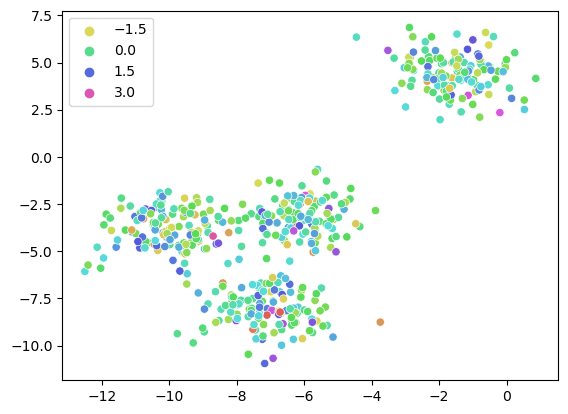

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=X[:,0], y=X[:,1], hue=y,palette="hls")
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194


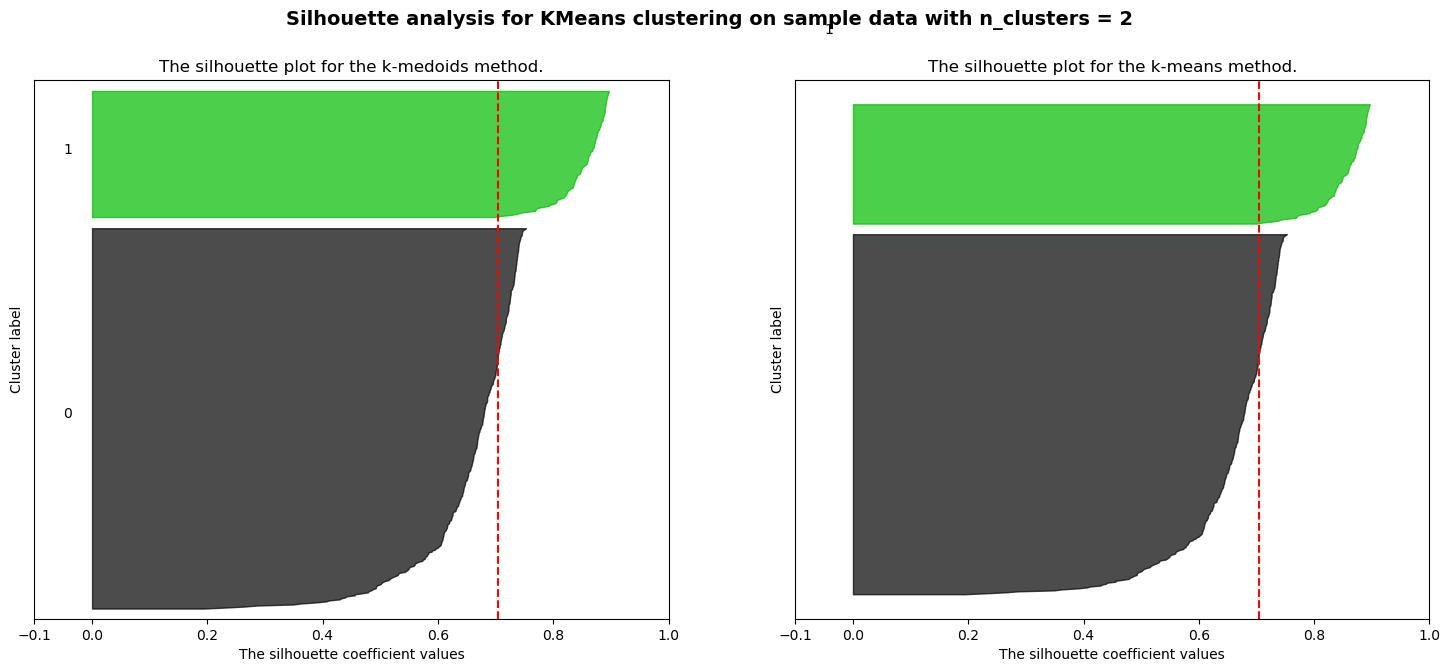

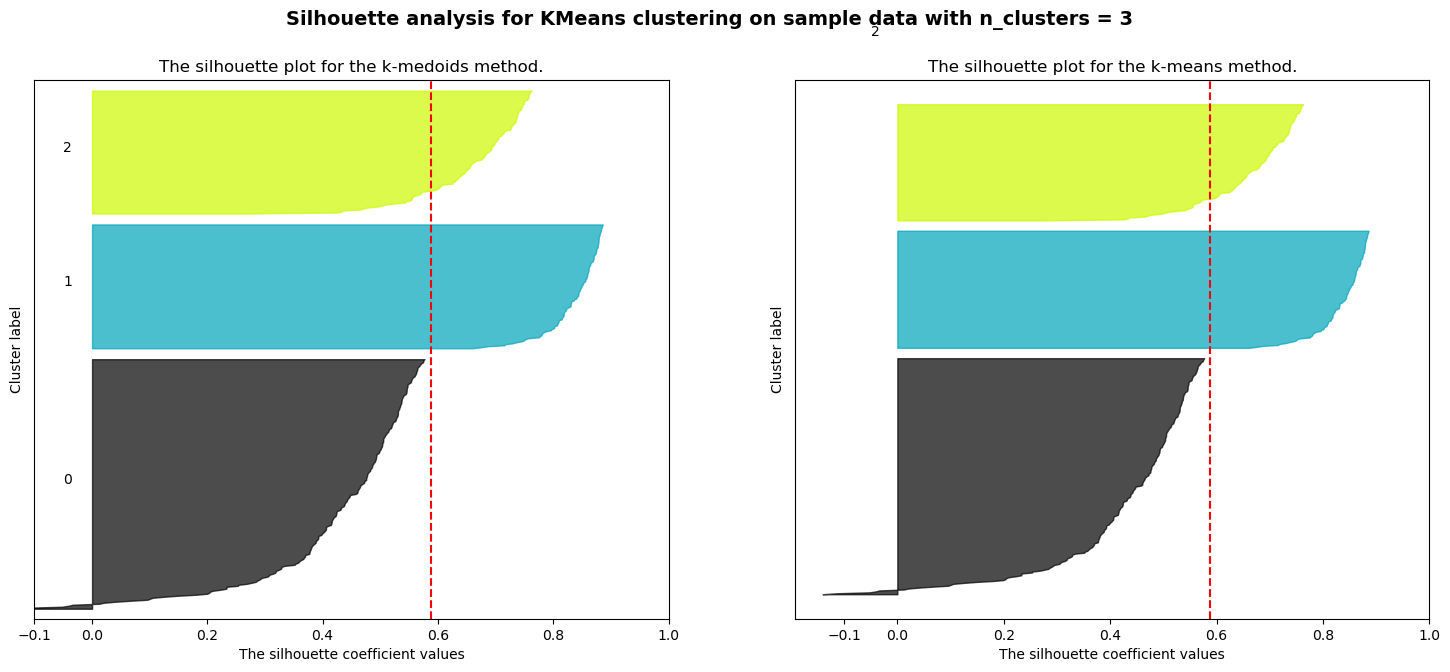

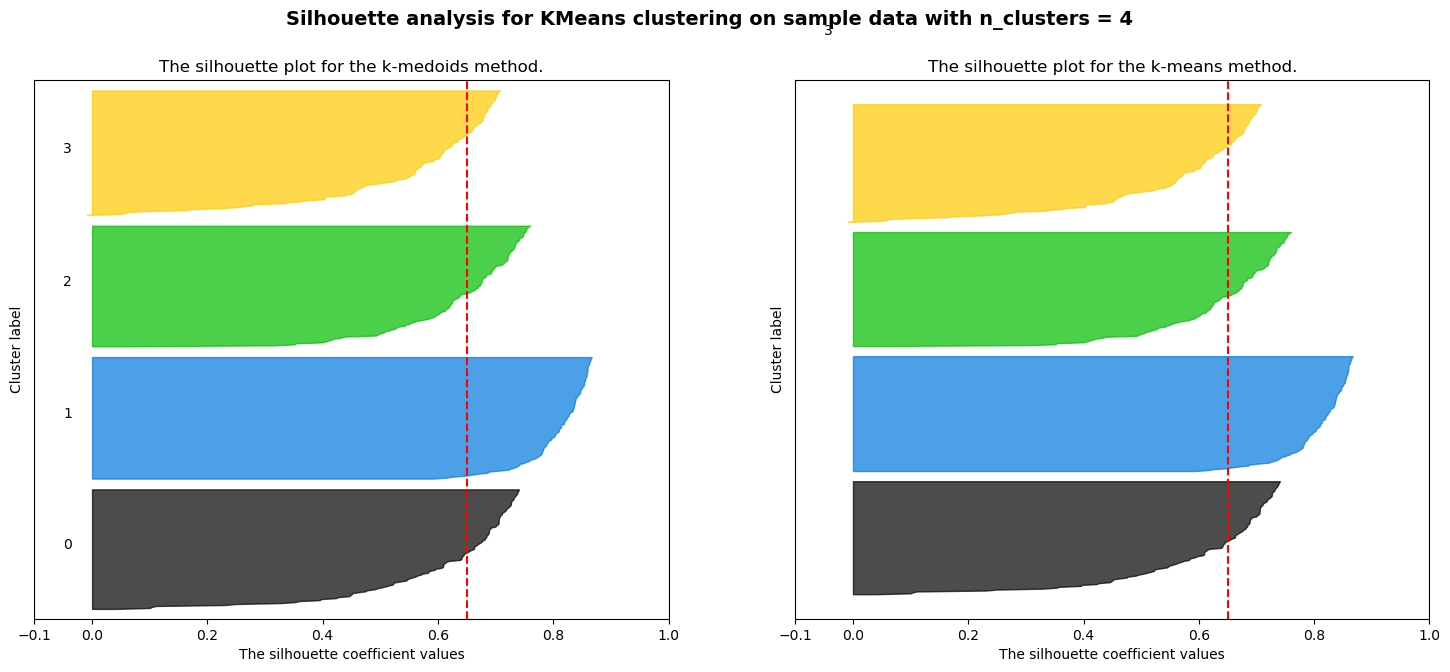

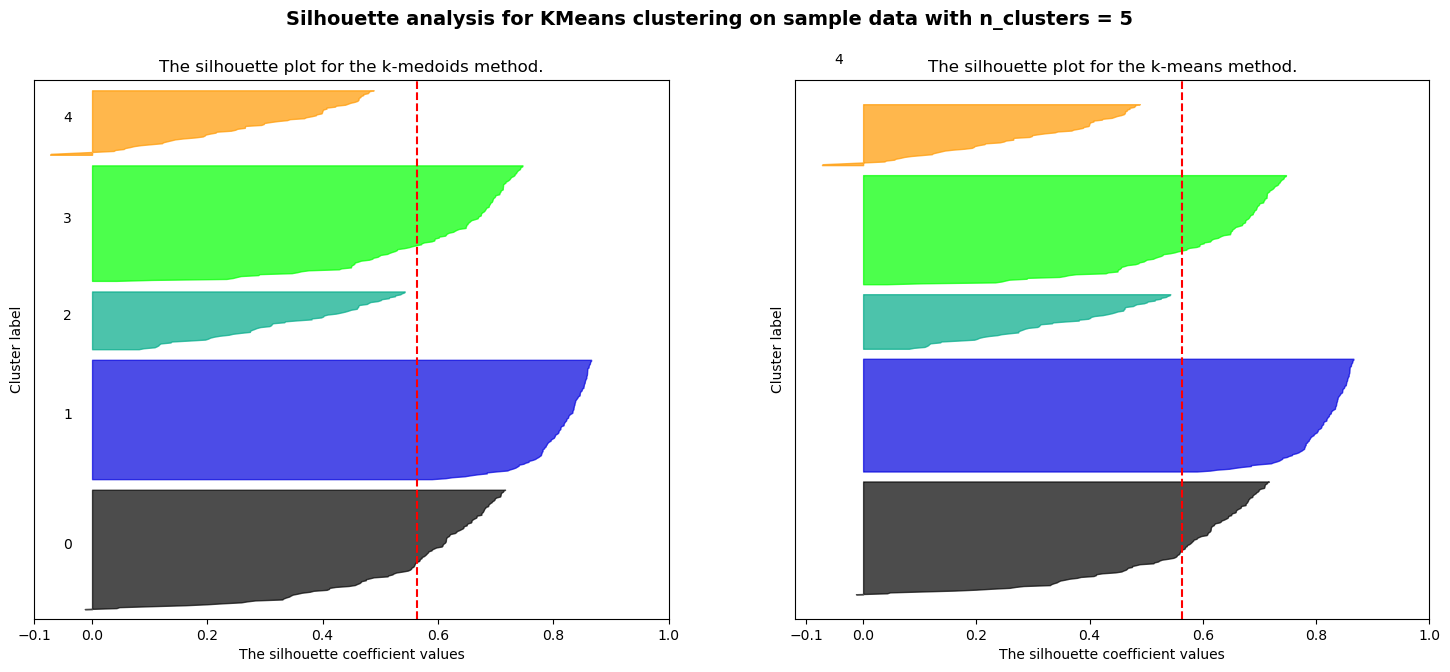

In [9]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans,SpectralClustering,DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility

range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        ax2.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the k-medoids method.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    # Label the silhouette plots with their cluster numbers at the middle
    ax2.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

    ax2.set_title("The silhouette plot for the k-means method.")
    ax2.set_xlabel("The silhouette coefficient values")
    ax2.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax2.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax2.set_yticks([])  # Clear the yaxis labels / ticks
    ax2.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

6.	Use the following code snippet to create different types of scattered data: 
    import numpy as np
    from sklearn import cluster, datasets, mixture

    # ============
    # Generate datasets. We choose the size big enough to see the scalability # of the algorithms, but not too big to avoid too long running times
    # ============
    n_samples = 500
    noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
    noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05) blobs = datasets.make_blobs(n_samples=n_samples, random_state=8) no_structure = np.random.rand(n_samples, 2), None
    

    # Anisotropically distributed data random_state = 170
    X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state) transformation = [[0.6, -0.6], [-0.4, 0.8]]
    X_aniso = np.dot(X, transformation)
    aniso = (X_aniso, y)

    # blobs with varied variances
    varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
    )
    a.	Plot the different datasets in separate figures. What can you say about them?
    b.	Apply k-means, k-medoids, DBSCAN and Spectral Clustering from Scikit-Learn over each dataset and compare the results of each algorithm with respect to each dataset.


In [22]:
import numpy as np
from sklearn import cluster, datasets, mixture
# ============
# Generate datasets. We choose the size big enough to see the scalability # of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05) 
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8) 
no_structure = np.random.rand(n_samples, 2), None


# Anisotropically distributed 
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state) 
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

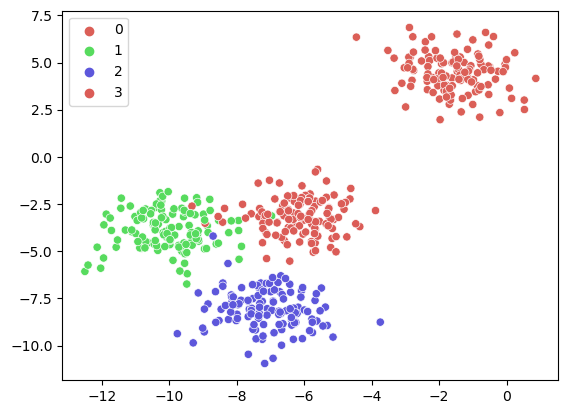

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=X[:,0], y=X[:,1], hue=y,palette="hls")
plt.show()

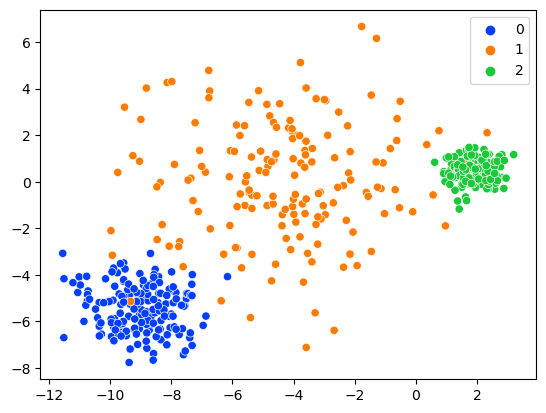

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=varied[0][:,0], y=varied[0][:,1], hue=varied[1], palette='bright')

plt.show()

In [1]:
from sklearn.cluster import KMeans,SpectralClustering,DBSCAN
# from sklearn_extra.cluster import KMedoids

ModuleNotFoundError: No module named 'sklearn_extra'